# ***##step by step denoise##***

## 1.创建各个部分的模型

In [1]:
from PIL import Image

import torch
import os
from diffusers import DDPMPipeline, DDIMPipeline, DDIMScheduler
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
from diffusers.utils import load_image
from matplotlib import pyplot as plt
import numpy as np

/home/ubunto/software/miniconda3/envs/dif/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/ubunto/software/miniconda3/envs/dif/lib/python3.9/site-packages/diffusers/models/transformers/transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_outputs import Transformer2DModelOutput`, instead.
  deprecate("Transformer2DModelOutput", "1.0.0", deprecation_message)


In [14]:
prompt = ''

device = 'cuda'
seed = 2
# noisy_sample = torch.randn(
#     1, 4, 64, 64
# ).to(device)

In [3]:
def display_sample(sample, i):
    image_processed = sample.cpu().permute(0, 2, 3, 1)
    image_processed = (image_processed + 1.0) * 127.5
    image_processed = image_processed.numpy().astype(np.uint8)

    image_pil = Image.fromarray(image_processed[0])
    display(f"Image at step {i}")
    display(image_pil)

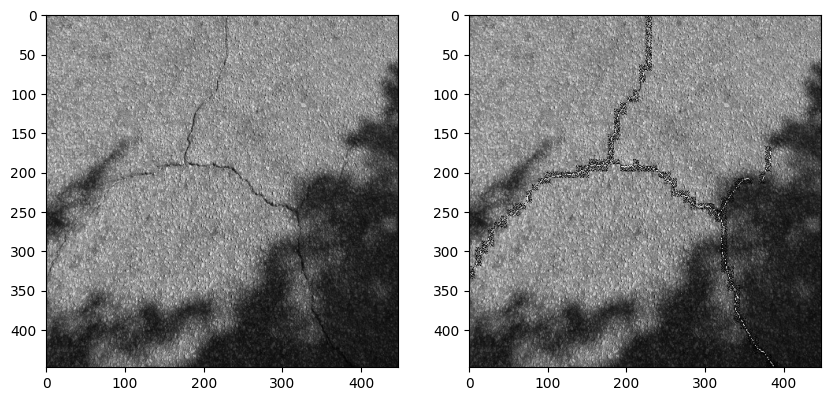

In [17]:
image_name = 'CRACK500_20160222_114759_1_1081'
image_name = 'DeepCrack_11249-8'
image_name = 'DeepCrack_11171'
image_name = 'DeepCrack_11143'
image_name = 'DeepCrack_11150'
image_name = 'cracktree200_6724'

image_dir = f'/home/ubunto/Project/konglx/generate/diffusers/datasets/corrosion_and_crack/crack_with_bg_for_test/images/{image_name}.jpg'

conditioning_image_dir = f'/home/ubunto/Project/konglx/generate/diffusers/datasets/corrosion_and_crack/crack_with_bg_for_test/conditioning_images/{image_name}.png'
conditioning_image_pil = load_image(conditioning_image_dir)
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(Image.open(image_dir))

plt.subplot(1,2,2)
plt.imshow(conditioning_image_pil)



100%|██████████| 20/20 [00:01<00:00, 12.42it/s]


Generated image for cracktree200_6724


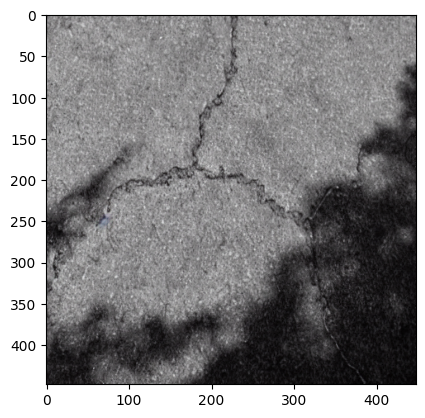

In [18]:
control_trained_dir = '/home/ubunto/Project/konglx/generate/diffusers/examples/controlnet/controlnet-model_crack_with_bg_inpainting_h-256_w-256_2024-08-12_17:09:20_seeds-2024/checkpoint-4700/controlnet'
config_dir = '/home/ubunto/Project/konglx/generate/ControlNet/models/stable-diffusion-v1-5'

controlnet_crack = ControlNetModel.from_pretrained(control_trained_dir)
pipeline = StableDiffusionControlNetPipeline.from_pretrained(config_dir, controlnet=controlnet_crack).to(device)

generator = torch.Generator(device=device).manual_seed(seed)
# pipeline.unet.use_freeu = True

validation_image = [conditioning_image_pil]
image = pipeline(prompt, validation_image, num_inference_steps=20, generator=generator   #, controlnet_conditioning_scale=controlnet_conditioning_scale_list
                , guidance_scale=7.5
                # , iter_times = 10
                ).images[0]
print(f'Generated image for {image_name}')
# if save_dir is not None:
#     image.save(os.path.join(save_dir, f'{img_name}.jpg'))
# plt.subplot(122)
plt.imshow(image)
plt.show()